# Travel Insurance

**Contexto**<br>
Una empresa de viajes y excursiones ofrece un paquete de seguro de viaje a sus clientes. El nuevo paquete de seguro también incluye la cobertura Covid. La empresa requiere saber qué clientes estarían interesados en comprarlo en función del historial de su base de datos. El seguro se ofreció a algunos de los clientes en 2019 y los datos proporcionados se han extraído del rendimiento / ventas del paquete durante ese período. Los datos se proporcionan para casi 2000 de sus clientes anteriores y debe crear un modelo inteligente que pueda predecir si el cliente estará interesado en comprar el paquete de seguro de viaje en función de ciertos parámetros que se detallan a continuación.

**Contenido**<br>
-**Age**-  Age Of The Customer <br>
-**Employment Type**-  The Sector In Which Customer Is Employed<br>
-**GraduateOrNot**-  Whether The Customer Is College Graduate Or Not<br>
-**AnnualIncome**-  The Yearly Income Of The Customer In Indian ------Rupees[Rounded To Nearest 50 Thousand Rupees]<br>
-**FamilyMembers**-  Number Of Members In Customer's Family<br>
-**ChronicDisease**-  Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.<br>
-**FrequentFlyer**-  Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].<br>
-**EverTravelledAbroad**-  Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]<br>
-**TravelInsurance**-  Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.<br>


**Fuente:** https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("pastel")

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv", index_col=0, encoding = "ISO-8859-1")

# Agrego una columna en dólares para el ingreso anual,
# también una con el nro de salarios medios que representa el ingreso
# de cada cliente, para tener una idea de su posición económica

usd_por_rupia = 0.013 # cotización de la rupia
salario_medio_anual_rupias = 32840 * 12 # salario medio mensual en india x 12

def rupias_a_dolares(rupias):
    return rupias * usd_por_rupia

def salarios_minimos(rupias):
    return rupias / salario_medio_anual_rupias

df["AnnualIncomeUSD"] = df["AnnualIncome"].apply(rupias_a_dolares)
df["AnnualIncomeMeanWages"] = df["AnnualIncome"].apply(salarios_minimos)
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance', 'AnnualIncomeUSD',
       'AnnualIncomeMeanWages'],
      dtype='object')

In [3]:
df.head(1)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeUSD,AnnualIncomeMeanWages
0,31,Government Sector,Yes,400000,6,1,No,No,0,5200.0,1.015022


Veo que hay variables booleanas que están expresadas como Yes y No. Las convierto todas a 1s y 0s

In [4]:
def textoABinario(texto):
    if texto == "Yes":
        return 1
    else:
        return 0
df["GraduateOrNot"]=df["GraduateOrNot"].apply(textoABinario)
df["FrequentFlyer"]=df["FrequentFlyer"].apply(textoABinario)
df["EverTravelledAbroad"]=df["EverTravelledAbroad"].apply(textoABinario)
df.head(1)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeUSD,AnnualIncomeMeanWages
0,31,Government Sector,1,400000,6,1,0,0,0,5200.0,1.015022


In [5]:
df.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncomeUSD,AnnualIncomeMeanWages
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323,12125.918470,2.366938
std,2.913308,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332,4899.123902,0.956292
min,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,3900.000000,0.761267
25%,28.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000,7800.000000,1.522533
50%,29.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000,11700.000000,2.283800
75%,32.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000,16250.000000,3.171945
max,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000,23400.000000,4.567600


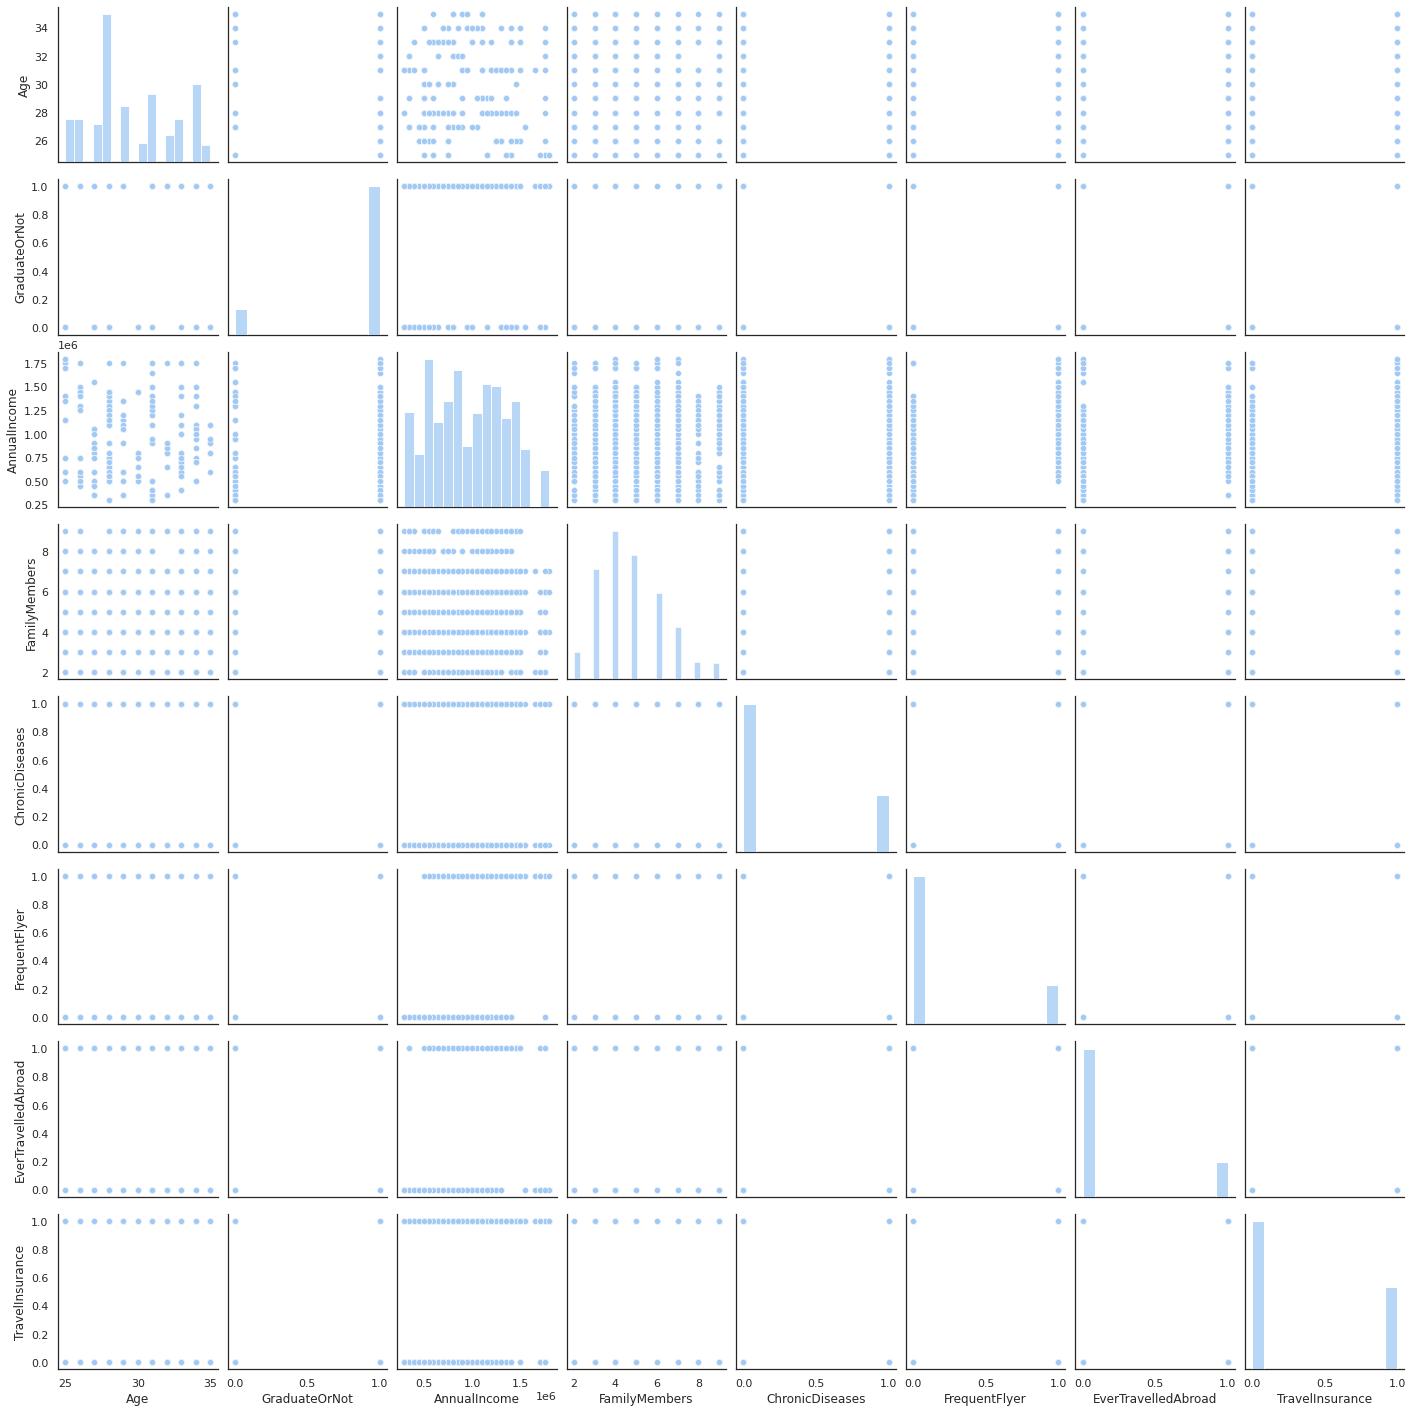

In [6]:
sns.pairplot(df.drop(["AnnualIncomeMeanWages", "AnnualIncomeUSD"], axis=1))

### Edades

Primero veamos la distribución general de edades de los clientes

<AxesSubplot:xlabel='Age', ylabel='Count'>

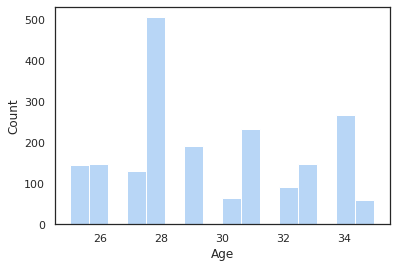

In [7]:
sns.histplot(data=df, x="Age")

Puede verse que los clientes son personas jóvenes entre los 25 y 35 años. Dentro de estas edades la distribución es bastante pareja, aunque con cierta asimetría hacia los más jóvenes, con una edad media cercana a los 29 años. 

**¿Cómo se diferencian en edad quienes se aseguran vs quienes no?**

<AxesSubplot:xlabel='TravelInsurance', ylabel='Age'>

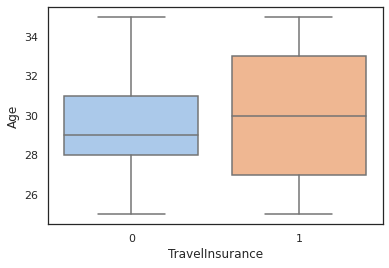

In [8]:
sns.boxplot(x="TravelInsurance", y="Age", data=df)

Puede observarse que la distribución de edades entre quienes adquieren un seguro de viaje y quienes no es bastante similar. Se nota más concentración de edad alrededor de la media entre quienes no adquieren seguros de viaje. Más allá de leves tendencias, no se observa que la edad sea un factor determinante en la decisión de adquirir un seguro.

### Posición económica

Los ingresos de los clientes se distribuyen en un rango bastante amplio, con una media de unos 12 mil dólares, lo que en India en 2021 representa unos 2,4 salarios medios. El cliente con menos ingresos percibe una ganancia anual de aproximadamente un tercio de dicha cantidad, mientras que los más acaudalados ganan alrededor del doble que la media de los clientes.<br>
Puede verse que los clientes en general tienen un buen pasar económico, lo cual es esperable pues pueden permitirse hacer un viaje.

<AxesSubplot:xlabel='AnnualIncomeUSD', ylabel='Count'>

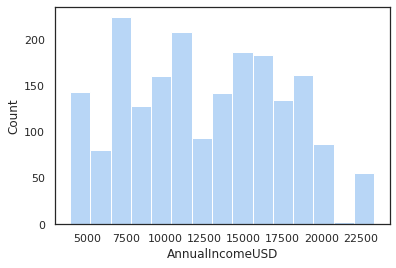

In [9]:
sns.histplot(data=df, x="AnnualIncomeUSD")

Veamos ahora cómo se diferencian los ingresos de aquellas personas que adquieren un seguro de las que no

<AxesSubplot:xlabel='TravelInsurance', ylabel='AnnualIncomeUSD'>

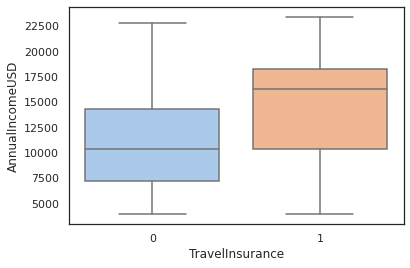

In [10]:
sns.boxplot(x="TravelInsurance", y="AnnualIncomeUSD", data=df)

Si bien existe bastante solapamiento entre ambos grupos, puede verse que las personas que adquirieron un seguro tienden a tener mayores ingresos que aquellas que no.

### Enfermedades Crónicas

In [11]:
tt = df.groupby(["TravelInsurance", "ChronicDiseases"]).count()
tt["Age"]

TravelInsurance  ChronicDiseases
0                0                  930
                 1                  347
1                0                  505
                 1                  205
Name: Age, dtype: int64

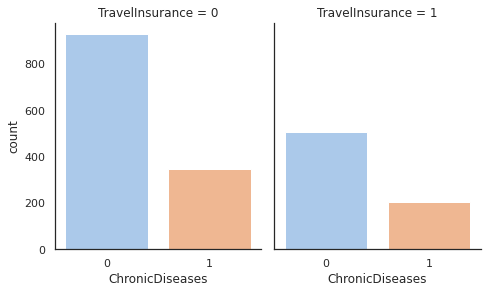

In [12]:
sns.catplot(x="ChronicDiseases", col="TravelInsurance", col_wrap=4,
                data=df,
                kind="count", height=4, aspect=.8)

In [13]:
ttlist = tt["Age"].tolist()
ttlist

[930, 347, 505, 205]

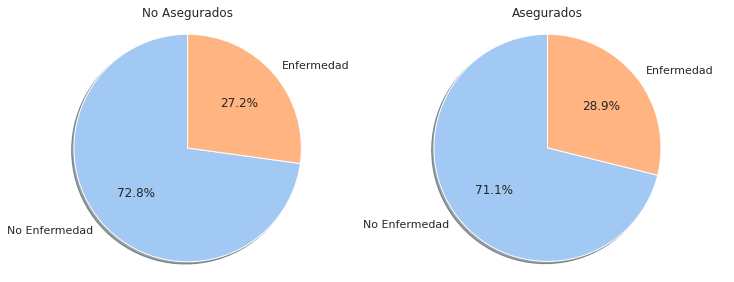

In [14]:
labels = 'No Enfermedad', 'Enfermedad'
vals1 = ttlist[:2]
vals2 = ttlist[2:]

fig = plt.figure(figsize=(10, 7))

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax2 = fig.add_axes([0.5, .0, .5, .5], aspect=1)

ax1.pie(vals1, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.pie(vals2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio asegura que la figura se muestre como un círculo.
ax2.axis('equal')  

ax1.set_title('No Asegurados')
ax2.set_title('Asegurados')

plt.show()

Puede verse en el gráfico anterior que hay más personas con enfermedades crónicas que no contratan un seguro que las que sí lo hacen, lo cual muestra que existen otros factores que influyen la desición. Además, puede verse que la proporción de personas con y sin enfermedades crónicas en similar entre los grupos que compran o no seguros. El tener una enfermedad crónica no parece estar asociado a un mayor interés en seguros.